In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from os.path import join
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from marbleri.evaluate import *

In [2]:
ls /glade/work/dgagne/hwrf_2020_rt_hour_output_20211104/

adeck_dense_base_discrete/
adeck_dense_focal_discrete/
adeck_dense_rps_discrete/
best_track_test.csv
best_track_train.csv
best_track_val.csv
dense_base_discrete_f024.h5
dense_base_discrete_f027.h5
dense_base_discrete_f030.h5
dense_base_discrete_f033.h5
dense_base_discrete_f036.h5
dense_base_discrete_f039.h5
dense_base_discrete_f042.h5
dense_base_discrete_f045.h5
dense_base_discrete_f048.h5
dense_base_discrete_f051.h5
dense_base_discrete_f054.h5
dense_base_discrete_f057.h5
dense_base_discrete_f060.h5
dense_base_discrete_f063.h5
dense_base_discrete_f066.h5
dense_base_discrete_f069.h5
dense_base_discrete_f072.h5
dense_base_discrete_f075.h5
dense_base_discrete_f078.h5
dense_base_discrete_f081.h5
dense_base_discrete_f084.h5
dense_base_discrete_f087.h5
dense_base_discrete_f090.h5
dense_base_discrete_f093.h5
dense_base_discrete_f096.h5
dense_base_discrete_f099.h5
dense_base_discrete_f102.h5
dense_base_discrete_f105.h5
dense_base_discrete_f108.h5
dense_base_discrete_f111.h5
dense_base_discrete

In [4]:
train = pd.read_csv("/glade/work/dgagne/hwrf_2020_rt_hour_output_20211104/best_track_train.csv")

<AxesSubplot:>

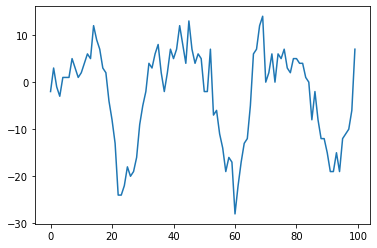

In [4]:
train["VMAX_dt_24"][0:100].plot()

In [5]:
out_path = "/glade/work/dgagne/hwrf_2020_rt_hour_output_20211104/"
score_file = join(out_path, "dense_base_discrete_val_discrete_scores.csv")
lin_score_file = join(out_path, "dense_base_discrete_val_linear_scores.csv")

scores = pd.read_csv(score_file, index_col="subset")
linear_scores = pd.read_csv(lin_score_file, index_col="subset")

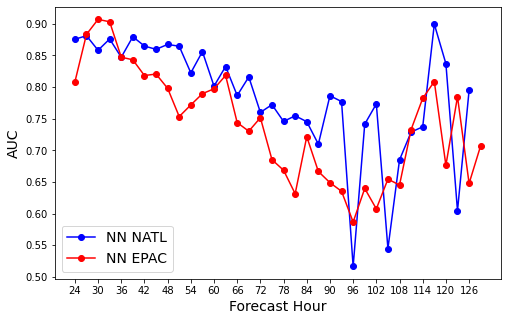

In [45]:
plt.figure(figsize=(8, 5))

e_rows = scores.index[scores.index.str.contains("e")]
l_rows = scores.index[scores.index.str.contains("l")]

plt.plot(np.arange(24, 129, 3), scores.loc[e_rows, "AUC_30"], 'bo-', label="NN NATL")
plt.plot(np.arange(24, 132, 3), scores.loc[l_rows, "AUC_30"], 'ro-', label="NN EPAC")
plt.xticks(np.arange(24, 132, 6))
plt.legend(fontsize=14)

plt.xlabel("Forecast Hour", fontsize=14)
plt.ylabel("AUC", fontsize=14)
plt.savefig("nn_auc_fhour.png", dpi=200, bbox_inches="tight", facecolor="w")

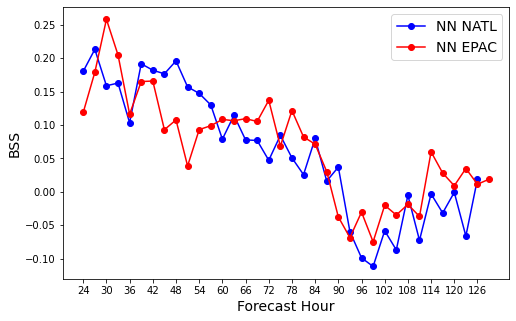

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(24, 129, 3), scores.loc[e_rows, "BSS_30"], 'bo-', label="NN NATL")
plt.plot(np.arange(24, 132, 3), scores.loc[l_rows, "BSS_30"], 'ro-', label="NN EPAC")
plt.xticks(np.arange(24, 132, 6))

plt.xlabel("Forecast Hour", fontsize=14)
plt.ylabel("BSS", fontsize=14)
plt.legend(fontsize=14)
plt.savefig("nn_bss_fhour.png", dpi=200, bbox_inches="tight", facecolor="w")

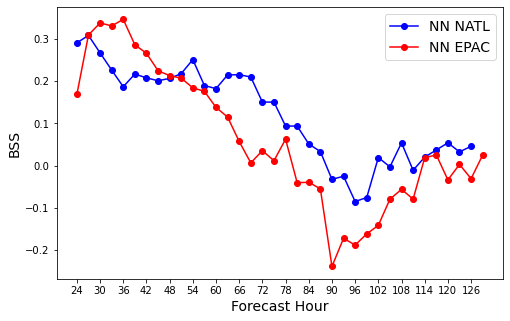

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(24, 129, 3), scores.loc[e_rows, "BSS_20"], 'bo-', label="NN NATL")
plt.plot(np.arange(24, 132, 3), scores.loc[l_rows, "BSS_20"], 'ro-', label="NN EPAC")
plt.xticks(np.arange(24, 132, 6))

plt.xlabel("Forecast Hour", fontsize=14)
plt.ylabel("BSS", fontsize=14)
plt.legend(fontsize=14)
plt.savefig("nn_bss_fhour.png", dpi=200, bbox_inches="tight", facecolor="w")

In [36]:
preds_2018 = pd.read_csv("/glade/work/dgagne/hwrf_2020_rt_hour_output_20211104/dense_base_discrete_val_discrete_predictions.csv")
preds_2019 = pd.read_csv("/glade/work/dgagne/hwrf_2020_rt_hour_output_20211104/dense_base_discrete_test_discrete_predictions.csv")
preds_all = pd.concat([preds_2018, preds_2019], ignore_index=True)

In [56]:
preds_all.columns

Index(['run', 'time', 'DATE', 'STNAM', 'STNUM', 'BASIN', 'INIT_HOUR', 'VALID',
       'TIME', 'LON', 'LAT', 'STM_SPD', 'STM_HDG', 'LAND', 'VMAX',
       'vmax_bt_new_dt_24', 'dense_base_discrete', 'dense_base_discrete_42',
       'dense_base_discrete_38', 'dense_base_discrete_32',
       'dense_base_discrete_28', 'dense_base_discrete_22',
       'dense_base_discrete_18', 'dense_base_discrete_12',
       'dense_base_discrete_08', 'dense_base_discrete_02',
       'dense_base_discrete_-2', 'dense_base_discrete_-8',
       'dense_base_discrete_-12', 'dense_base_discrete_-18',
       'dense_base_discrete_-22', 'dense_base_discrete_-28',
       'dense_base_discrete_-32', 'dense_base_discrete_-38',
       'dense_base_discrete_-42'],
      dtype='object')

In [9]:
y_bins = np.arange(-42.5, 47.5, 5)
np.searchsorted(y_bins, 30)

15

In [10]:

preds_all.loc[preds_all["STNAM"] == "michael"]["run"].unique()

array([293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305,
       306, 307, 308])

/glade/work/dgagne/miniconda3/envs/marbleri/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


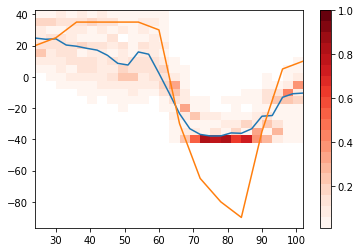

In [37]:
pbins = preds_all.columns[preds_all.columns.str.contains("dense_base_discrete_")]

idx = (preds_all["STNAM"] == "michael") & (preds_all["run"] == 295)
r_pred = preds_all.loc[idx, pbins].T
plt.pcolormesh(preds_all.loc[idx, "TIME"], y_bins,np.ma.array(r_pred, mask=r_pred < 0.01), 
               vmin=0.01, vmax=1, cmap=plt.get_cmap("Reds", 20))
plt.plot(preds_all.loc[idx, "TIME"], preds_all.loc[idx, "dense_base_discrete"])
plt.plot(preds_all.loc[idx, "TIME"], preds_all.loc[idx, 'vmax_bt_new_dt_24'])

plt.colorbar()

<BarContainer object of 18 artists>

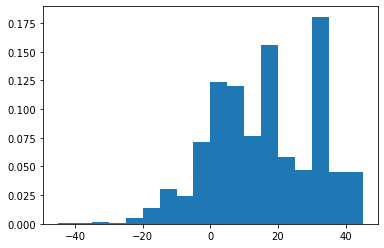

In [44]:
plt.bar(y_bins, r_pred.values[:, 5], width=5)

In [12]:
preds_all.loc[idx, "TIME"]

7452     24
7453     27
7454     30
7455     33
7456     36
7457     39
7458     42
7459     45
7460     48
7461     51
7462     54
7463     57
7464     60
7465     63
7466     66
7467     69
7468     72
7469     75
7470     78
7471     81
7472     84
7473     87
7474     90
7475     93
7476     96
7477     99
7478    102
Name: TIME, dtype: int64

In [178]:
preds_all.columns

Index(['run', 'time', 'DATE', 'STNAM', 'STNUM', 'BASIN', 'INIT_HOUR', 'VALID',
       'TIME', 'LON', 'LAT', 'STM_SPD', 'STM_HDG', 'LAND', 'VMAX',
       'vmax_bt_new_dt_24', 'dense_rps_discrete', 'dense_rps_discrete_-42.5',
       'dense_rps_discrete_-37.5', 'dense_rps_discrete_-32.5',
       'dense_rps_discrete_-27.5', 'dense_rps_discrete_-22.5',
       'dense_rps_discrete_-17.5', 'dense_rps_discrete_-12.5',
       'dense_rps_discrete_-7.5', 'dense_rps_discrete_-2.5',
       'dense_rps_discrete_2.5', 'dense_rps_discrete_7.5',
       'dense_rps_discrete_12.5', 'dense_rps_discrete_17.5',
       'dense_rps_discrete_22.5', 'dense_rps_discrete_27.5',
       'dense_rps_discrete_32.5', 'dense_rps_discrete_37.5',
       'dense_rps_discrete_42.5'],
      dtype='object')

In [141]:
preds_all.loc[idx, pbins].T.max()

7548    0.264327
7549    0.248318
7550    0.146461
7551    0.156898
7552    0.123687
7553    0.453323
7554    0.394062
7555    0.422495
7556    0.715989
7557    0.787322
7558    0.719522
7559    0.826616
7560    0.452198
7561    0.295754
7562    0.361368
7563    0.354331
7564    0.581471
7565    0.510747
7566    0.406444
dtype: float64

In [137]:
preds_all.loc[idx]["TIME"]

7567    24
7568    27
7569    30
7570    33
7571    36
7572    39
7573    42
7574    45
7575    48
7576    51
7577    54
7578    57
7579    60
7580    63
7581    66
7582    69
7583    72
Name: TIME, dtype: int64

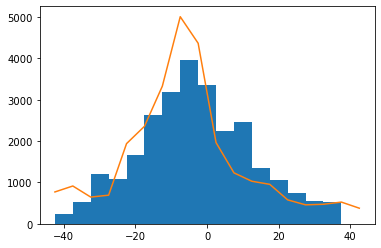

In [221]:
plt.hist(preds_all["vmax_bt_new_dt_24"], bins=np.arange(-42.5, 42.5, 5))
plt.plot(y_bins, preds_all[pbins].sum(axis=0))